In [3]:
import pandas as pd
import numpy as np
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas.api.types import is_list_like
from pandas_datareader import data, wb
from datetime import datetime
import pandas_datareader as pdr
%matplotlib inline

In [4]:
import datetime as dt

In [5]:
import pandas_datareader.data as web

Will retrieve stock information from the following banks: Bank of America, Citigroup, Goldman Sachs, JP Morgan Chase, Morgan Stanley and Wells Fargo using stooq index data

The stock data will be from 2006 to 2016 for each of these banks

In [6]:
start = dt.datetime(2006,1,1)
end = dt.datetime(2016,1,1)

In [7]:
BAC = web.DataReader('BAC', 'stooq',start,end) 
C = web.DataReader('C', 'stooq',start,end) 
GS = web.DataReader('GS', 'stooq',start,end) 
JPM = web.DataReader('JPM', 'stooq',start,end) 
MS = web.DataReader('MS', 'stooq',start,end) 
WFC = web.DataReader('MS', 'stooq',start,end) 

In [8]:
BAC #check the dataframe

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,14.7814,14.8325,14.6233,14.6233,5.417059e+07
2015-12-30,14.9473,14.9807,14.8070,14.8168,4.030734e+07
2015-12-29,14.9897,15.0780,14.9130,15.0131,5.251059e+07
2015-12-28,14.9630,14.9720,14.7539,14.8846,4.803435e+07
2015-12-24,15.0495,15.1035,14.9630,15.0063,3.380344e+07
...,...,...,...,...,...
2006-01-09,39.3182,39.5294,39.0158,39.2181,1.855918e+07
2006-01-06,39.3850,39.4774,39.0089,39.1917,1.496529e+07
2006-01-05,39.2004,39.4126,38.9834,39.2525,1.761312e+07


In [9]:
tickers = ['BAC','C', 'GS', 'JPM','MS','WFC'] #created a list ticker symbols that will be used to explore the data

In [10]:
bank_stocks = pd.concat([BAC,C,GS,JPM, MS,WFC],axis=1,keys=tickers) #used concat to concatenate
#the bank dataframes to a single dataframe called bank_stocks

In [11]:
bank_stocks #we now have a multilevel index on the columns

BAC                                                  C  \
               Open     High      Low    Close        Volume      Open   
Date                                                                     
2006-01-03  39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.4920   
2006-01-04  39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.3580   
2006-01-05  39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.8430   
2006-01-06  39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.5040   
2006-01-09  39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.1740   
...             ...      ...      ...      ...           ...       ...   
2015-12-24  15.0495  15.1035  14.9630  15.0063  3.380344e+07   43.7209   
2015-12-28  14.9630  14.9720  14.7539  14.8846  4.803435e+07   43.7934   
2015-12-29  14.9897  15.0780  14.9130  15.0131  5.251059e+07   43.9520   
2015-12-30  14.9473  14.9807  14.8070  14.8168  4.030734e+07   44.0205   
2015-12-31  14.7814  14.8325  14.6233  14.6233  5.417059e+07   43.3773   

                                                        ...       MS           \
                High       Low     Close        Volume  ...     Open     High   
Date                                                    ...                     
2006-01-03  408.6150  398.1120  407.8910  1.858097e+06  ...  37.4934  38.3558   
2006-01-04  406.3250  400.0890  400.3540  2.260921e+06  ...  38.4971  38.8778   
2006-01-05  403.6630  400.5200  402.3210  1.371893e+06  ...  38.2675  38.4264   
2006-01-06  404.6410  398.8650  402.3210  1.655812e+06  ...  38.5432  38.5922   
2006-01-09  403.3290  399.6780  400.4320  2.031072e+06  ...  38.4470  38.8846   
...              ...       ...       ...           ...  ...      ...      ...   
2015-12-24   44.1281   43.6954   43.9089  5.607320e+06  ...  27.1547  27.2734   
2015-12-28   43.7934   43.2863   43.6347  1.051593e+07  ...  26.9820  26.9820   
2015-12-29   44.3357   43.9344   44.1369  1.218830e+07  ...  27.0448  27.2656   
2015-12-30   44.1027   43.5291   43.5692  1.051787e+07  ...  27.0998  27.2194   
2015-12-31   43.6426   43.1101   43.1101  1.353052e+07  ...  26.6023  26.9300   

                                                WFC                    \
                Low    Close        Volume     Open     High      Low   
Date                                                                    
2006-01-03  37.2060  38.2361  6.806387e+06  37.4934  38.3558  37.2060   
2006-01-04  38.2675  38.2675  1.009857e+07  38.4971  38.8778  38.2675   
2006-01-05  38.0448  38.3715  7.313990e+06  38.2675  38.4264  38.0448   
2006-01-06  38.0703  38.4108  8.721337e+06  38.5432  38.5922  38.0703   
2006-01-09  38.4412  38.8120  5.246244e+06  38.4470  38.8846  38.4412   
...             ...      ...           ...      ...      ...      ...   
2015-12-24  27.0448  27.0811  3.356089e+06  27.1547  27.2734  27.0448   
2015-12-28  26.6377  26.8211  6.501028e+06  26.9820  26.9820  26.6377   
2015-12-29  26.9506  27.1380  7.661993e+06  27.0448  27.2656  26.9506   
2015-12-30  26.8476  26.8721  6.065510e+06  27.0998  27.2194  26.8476   
2015-12-31  26.4865  26.5229  9.773893e+06  26.6023  26.9300  26.4865   

                                   
              Close        Volume  
Date                               
2006-01-03  38.2361  6.806387e+06  
2006-01-04  38.2675  1.009857e+07  
2006-01-05  38.3715  7.313990e+06  
2006-01-06  38.4108  8.721337e+06  
2006-01-09  38.8120  5.246244e+06  
...             ...           ...  
2015-12-24  27.0811  3.356089e+06  
2015-12-28  26.8211  6.501028e+06  
2015-12-29  27.1380  7.661993e+06  
2015-12-30  26.8721  6.065510e+06  
2015-12-31  26.5229  9.773893e+06  

[2517 rows x 30 columns]

In [12]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [13]:
bank_stocks #labeled the different index levels

Bank Ticker      BAC                                                  C  \
Stock Info      Open     High      Low    Close        Volume      Open   
Date                                                                      
2006-01-03   39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.4920   
2006-01-04   39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.3580   
2006-01-05   39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.8430   
2006-01-06   39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.5040   
2006-01-09   39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.1740   
...              ...      ...      ...      ...           ...       ...   
2015-12-24   15.0495  15.1035  14.9630  15.0063  3.380344e+07   43.7209   
2015-12-28   14.9630  14.9720  14.7539  14.8846  4.803435e+07   43.7934   
2015-12-29   14.9897  15.0780  14.9130  15.0131  5.251059e+07   43.9520   
2015-12-30   14.9473  14.9807  14.8070  14.8168  4.030734e+07   44.0205   
2015-12-31   14.7814  14.8325  14.6233  14.6233  5.417059e+07   43.3773   

Bank Ticker                                              ...       MS  \
Stock Info       High       Low     Close        Volume  ...     Open   
Date                                                     ...            
2006-01-03   408.6150  398.1120  407.8910  1.858097e+06  ...  37.4934   
2006-01-04   406.3250  400.0890  400.3540  2.260921e+06  ...  38.4971   
2006-01-05   403.6630  400.5200  402.3210  1.371893e+06  ...  38.2675   
2006-01-06   404.6410  398.8650  402.3210  1.655812e+06  ...  38.5432   
2006-01-09   403.3290  399.6780  400.4320  2.031072e+06  ...  38.4470   
...               ...       ...       ...           ...  ...      ...   
2015-12-24    44.1281   43.6954   43.9089  5.607320e+06  ...  27.1547   
2015-12-28    43.7934   43.2863   43.6347  1.051593e+07  ...  26.9820   
2015-12-29    44.3357   43.9344   44.1369  1.218830e+07  ...  27.0448   
2015-12-30    44.1027   43.5291   43.5692  1.051787e+07  ...  27.0998   
2015-12-31    43.6426   43.1101   43.1101  1.353052e+07  ...  26.6023   

Bank Ticker                                               WFC           \
Stock Info      High      Low    Close        Volume     Open     High   
Date                                                                     
2006-01-03   38.3558  37.2060  38.2361  6.806387e+06  37.4934  38.3558   
2006-01-04   38.8778  38.2675  38.2675  1.009857e+07  38.4971  38.8778   
2006-01-05   38.4264  38.0448  38.3715  7.313990e+06  38.2675  38.4264   
2006-01-06   38.5922  38.0703  38.4108  8.721337e+06  38.5432  38.5922   
2006-01-09   38.8846  38.4412  38.8120  5.246244e+06  38.4470  38.8846   
...              ...      ...      ...           ...      ...      ...   
2015-12-24   27.2734  27.0448  27.0811  3.356089e+06  27.1547  27.2734   
2015-12-28   26.9820  26.6377  26.8211  6.501028e+06  26.9820  26.9820   
2015-12-29   27.2656  26.9506  27.1380  7.661993e+06  27.0448  27.2656   
2015-12-30   27.2194  26.8476  26.8721  6.065510e+06  27.0998  27.2194   
2015-12-31   26.9300  26.4865  26.5229  9.773893e+06  26.6023  26.9300   

Bank Ticker                                  
Stock Info       Low    Close        Volume  
Date                                         
2006-01-03   37.2060  38.2361  6.806387e+06  
2006-01-04   38.2675  38.2675  1.009857e+07  
2006-01-05   38.0448  38.3715  7.313990e+06  
2006-01-06   38.0703  38.4108  8.721337e+06  
2006-01-09   38.4412  38.8120  5.246244e+06  
...              ...      ...           ...  
2015-12-24   27.0448  27.0811  3.356089e+06  
2015-12-28   26.6377  26.8211  6.501028e+06  
2015-12-29   26.9506  27.1380  7.661993e+06  
2015-12-30   26.8476  26.8721  6.065510e+06  
2015-12-31   26.4865  26.5229  9.773893e+06  

[2517 rows x 30 columns]

## Now that I prepared my data, I am now able to do some exploratory data analysis

Max Close Price for bank's stock throughtout the time period

In [14]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     46.2013
C      466.8120
GS     203.6910
JPM     57.1634
MS      58.5624
WFC     58.5624
dtype: float64

### Now want to show the returns for each bank stocks


In [15]:
returns = pd.DataFrame()

In [16]:
for tick in tickers:
    returns[tick+ ' Return'] = bank_stocks[tick]['Close'].pct_change() #created a column representing return
#value

In [17]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821,0.000821
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718,0.002718
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024,0.001024
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445,0.010445


Created a pairplot using seaborn for the returns dataframe

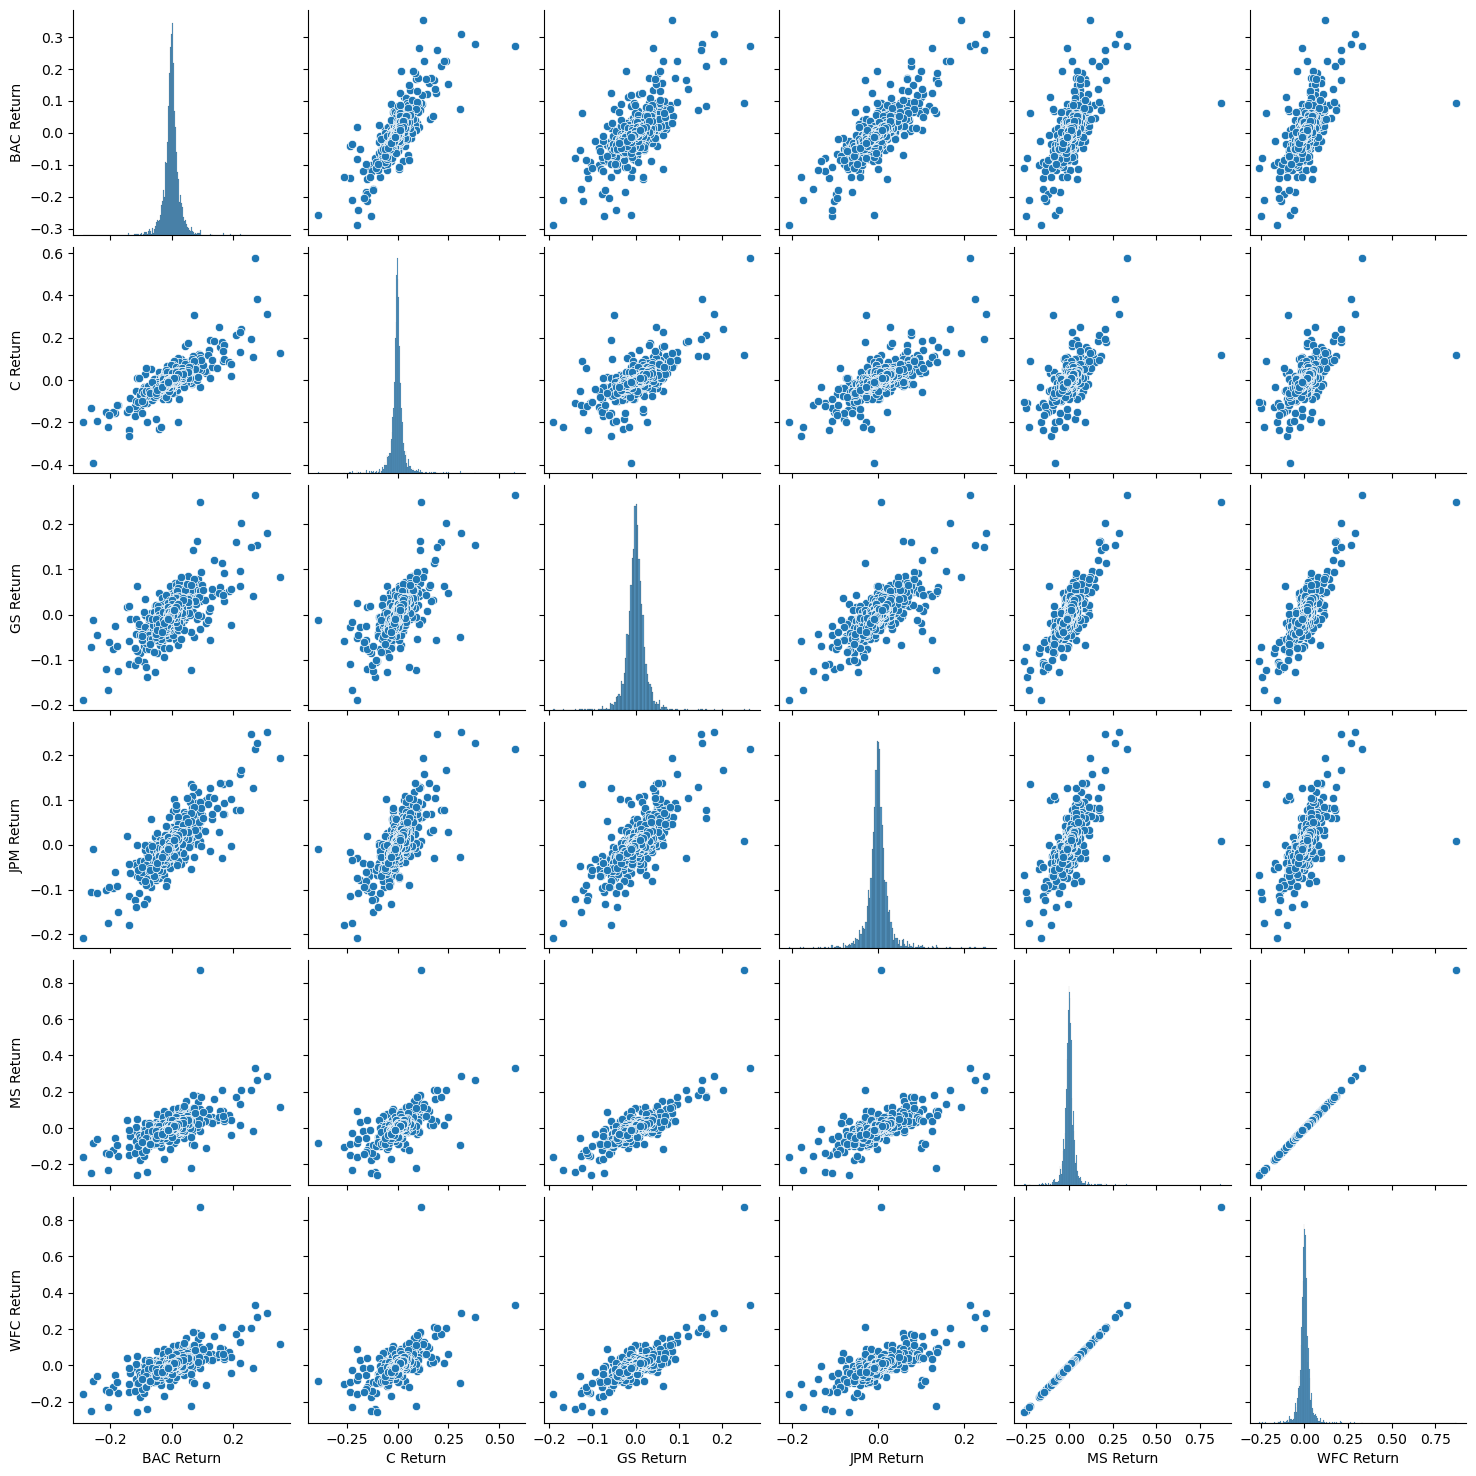

In [19]:
sns.pairplot(returns[1:])

 Dates each stock had the best and worst single day returns

In [21]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-10-13
dtype: datetime64[ns]

In [22]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2008-10-09
dtype: datetime64[ns]

Using standard deviation, displayed which stock was the riskiest over the entire period

In [23]:
returns.std() #Citigroup was the riskiest over the entire period

BAC Return    0.036605
C Return      0.038615
GS Return     0.025371
JPM Return    0.027670
MS Return     0.037708
WFC Return    0.037708
dtype: float64

In [24]:
returns.loc['2015-01-01': '2015-12-31'].std() #Bank of America had the riskiest stock in 2015

BAC Return    0.016149
C Return      0.015280
GS Return     0.014028
JPM Return    0.013964
MS Return     0.016006
WFC Return    0.016006
dtype: float64

In [25]:
BAC_R = returns.loc['2015-01-01': '2015-12-31']['BAC Return']

/Users/brianwrightjr./opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BAC Return', ylabel='Density'>

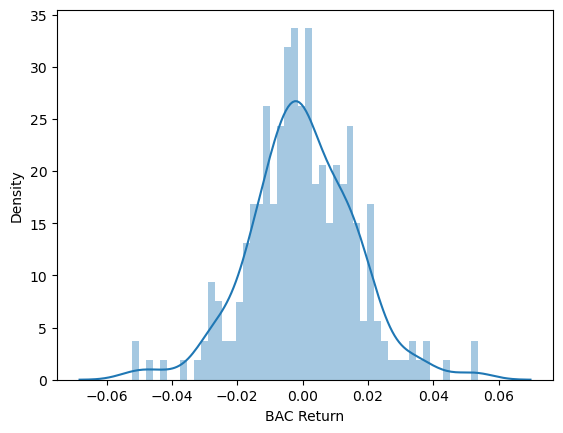

In [26]:
sns.distplot(BAC_R, bins=50) #Created a displot using seaborn of the 2015 returns for Bank of America

In [27]:
C_R = returns.loc['2008-01-01':'2008-12-31']['C Return']

sns.distplot(C_R,bins=50) #created a displot using seaborn of the 2008 returns for citigroup

Created a line plot showing the closing price for each bank for the entire index of time

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

<AxesSubplot:xlabel='Date'>

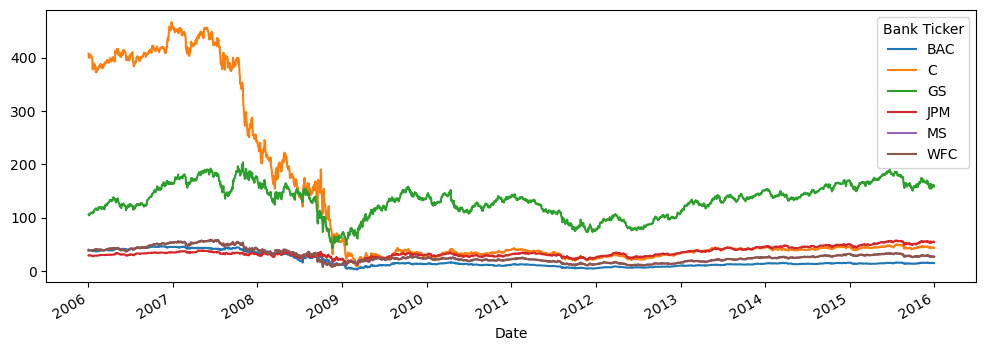

In [33]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(label=tick,figsize=(12,4))

Created a more interactive line plot using iplot showing closing price for each bank

In [36]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

Plotted the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008

/var/folders/kq/ynsq80gj2yb0cv5qqs9318k80000gn/T/ipykernel_20967/3538564702.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

/var/folders/kq/ynsq80gj2yb0cv5qqs9318k80000gn/T/ipykernel_20967/3538564702.py:2: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



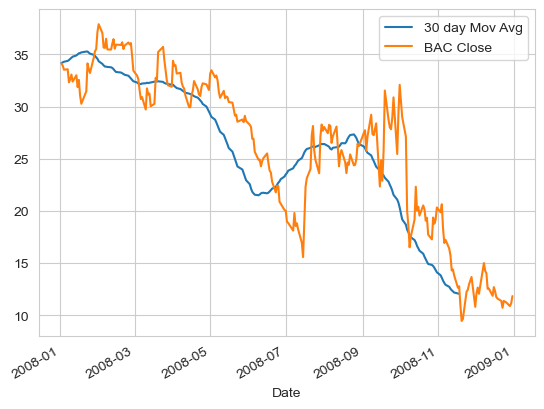

In [37]:
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day Mov Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()

Using .ta_plot created a Simple Moving Averagesa plot of Bank of America for year 2015

In [38]:
BAC15 = BAC['Close'].loc['2015-01-01':'2016-01-01']
BAC15.ta_plot(study='sma',periods=[13,21,55])

/var/folders/kq/ynsq80gj2yb0cv5qqs9318k80000gn/T/ipykernel_20967/1022919552.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

